# Digital Signal Processing for Speech, Language, & Hearing Scientists
# Chapter 3: Signal Synthesis

**Meg Cychosz**, *UCLA*

## Table of Contents
1. [Introduction](#intro)
2. [Synthesizing simple periodic signals](#periodic)
3. [Synthesizing complex periodic signals](#complex)
4. [Synthesizing aperiodic signals](#aperiodic)

In the previous tutorial we discussed how to take some acoustic measurements, particularly of amplitude, and how to perform some basic amplitude manipulations. In this tutorial, we'll discuss different types of sound signals and how to synthesize them. 

## Introduction<a name="intro"></a> 

There are two broad types of waveforms that we contend with in signal processing: **periodic** and **aperiodic**. Periodic signals/waveforms have a recurring pattern that repeats while aperiodic signals are random. Periodic signals can be **simple**, as in a simple sine wave, or **complex**, meaning that they are composed of multiple, overlaid simple sine waves. We'll synthesize some of these signals to explore them further. 

In [ ]:
import os, re
import parselmouth as pm
import librosa as lb
import numpy as np
import scipy as sc
from scipy import signal
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import Audio

## Synthesizing simple periodic signals<a name="periodic"></a>  

Here we'll use a handy `Librosa` function to generate simple tones, or sine waves, at three different frequencies: 

In [ ]:
sr = 44100

tone_100 = lb.tone(100,sr=sr,duration=1)
tone_1000 = lb.tone(1000,sr=sr,duration=1)
tone_10000 = lb.tone(10000,sr=sr,duration=1)

In [ ]:
# listen to pure sine waves at 100, 1000, and 10000 Hz
ipd.display(ipd.Audio(data=tone_100,rate=sr))
ipd.display(ipd.Audio(data=tone_1000,rate=sr))
ipd.display(ipd.Audio(data=tone_10000,rate=sr))

We can also generate simple sine waves in a couple simple lines of code, and then we'll visualize it. Let's generate a pure sine wave at one cycle/second. First we need x-axis, or time values. Here I'm specifying that I would like to create an array from 1 (first argument) to 10 (second argument) with a step size (third argument) that corresponds to our sampling rate:

In [ ]:
t = np.arange(1, 10, (1/sr)) # x-values

Next we generate the y-axis values. Sine waves are generated by multiplying `2π` by the desired *number* of cycles and the specified *length* of time. In this case, we want a 1Hz cycle (1 repetition/second) repeated over 10 seconds. 

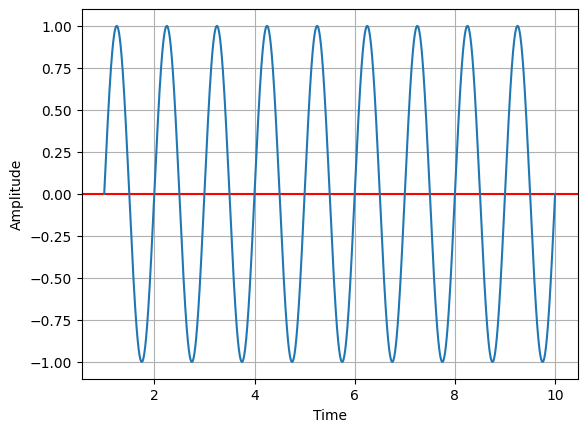

In [5]:
a = np.sin(t*(2*np.pi)*1) # y-values

plt.figure()
plt.grid(True, which='both')
plt.axhline(y=0, color='red')
plt.plot(t, a)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

The duration of each individual cycle in the above plot is called the **period**. If you know a sine wave's period (in seconds), you can derive its frequency by dividing 1/period. So in the code below, I generate additional sine waves at 5 and .5 Hz. But even if you didn't know that, you could compute the waves' frequencies by calculating their periods from the plots and taking 1/period.  

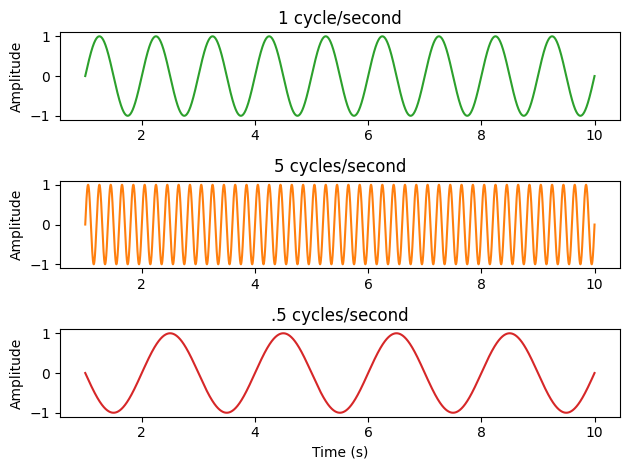

In [6]:
# sine waves at some different frequencies  
higher = np.sin(t*(2*np.pi)*5) 
lower = np.sin(t*(2*np.pi)*.5) 

fig, axs = plt.subplots(3)
axs[0].plot(t,a,'tab:green')
axs[0].set_title('1 cycle/second')
axs[1].plot(t,higher,'tab:orange')
axs[1].set_title('5 cycles/second')
axs[2].plot(t,lower,'tab:red')
axs[2].set_title('.5 cycles/second')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
fig.tight_layout()

for ax in axs.flat:
    ax.set(ylabel='Amplitude')

In addition to manipulating the frequency of the signal, using the sine wave function we can also easily manipulate amplitude by offsetting it (addition) or inverting it (multiplication):

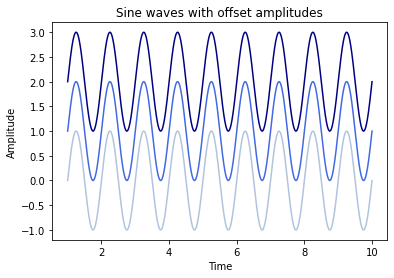

In [8]:
# offsetting the amplitude
a_higher = np.sin(t*(2*np.pi))+1 
a_highest = np.sin(t*(2*np.pi))+2 

plt.figure()
plt.plot(t, a, c='lightsteelblue')
plt.plot(t, a_higher, c='royalblue')
plt.plot(t, a_highest, c='navy')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Sine waves with offset amplitudes")
plt.show()

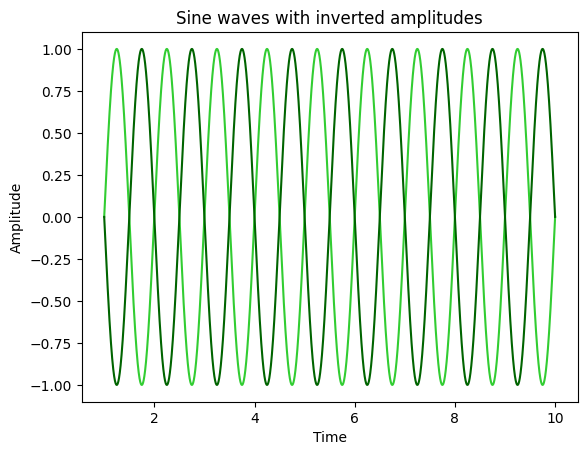

In [7]:
#inverting the amplitude
a_inverted = np.sin(t*(2*np.pi))*-1 

plt.figure()
plt.plot(t, a, c='limegreen')
plt.plot(t, a_inverted, c='darkgreen')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Sine waves with inverted amplitudes")
plt.show()

Finally, we can manipulate the **phase**, or timing, of a periodic signal. A signal's phase is only relevant when compared to another point, for example, a different signal. To explore this, let's generate a single .5Hz sine wave:

In [ ]:
phase_one = np.sin(t*(2*np.pi)*.5)

Sine waves represent the unit circle; one complete period is the equivalent of a turn around the unit circle. So, the peak of the period represents the 90° point around the unit circle, the zero-crossing represents 180°, and the lowest point of the period represents the 270° point around the circle. We won't use degrees to specify different phases, instead we'll translate those degrees around the unit circle to percentages:

In [ ]:
phase = .25 # specify values 0-1, representing 1-360° of the sine wave, or point around the unit circle
phase_increment = 2*np.pi*phase/sr

phase_offset = phase_increment * len(phase_one) # offset the original sine wave; note that the frequency
phase_two = 1*np.sin(2*np.pi*.5*t+phase_offset) # and amplitude are the same - the phase is the only difference!

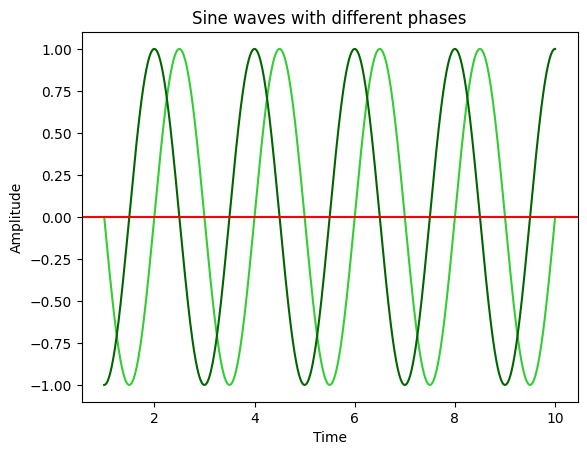

In [10]:
plt.figure()
plt.plot(t, phase_one, c='limegreen')
plt.plot(t, phase_two, c='darkgreen')
plt.axhline(y=0, color='red')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Sine waves with different phases")
plt.show()

## Synthesizing complex periodic signals<a name="complex"></a>  

All of the above cases were examples of simple periodic signals, generated at a single frequency. Speech, however, is an example of a complex signal or waveform, with multiple, overlapping frequencies. 

If we want to generate a complex, periodic signal, we can simply add our various sine waves together:

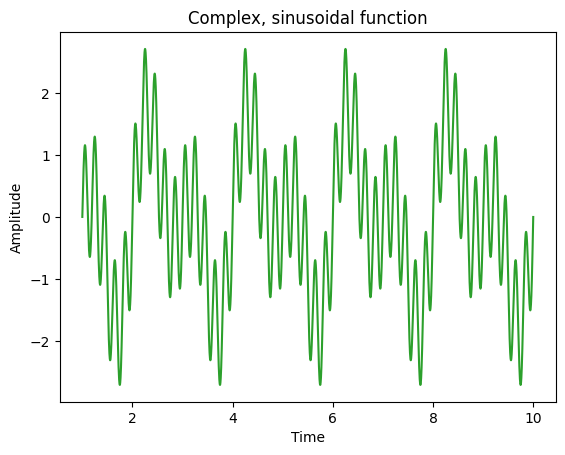

In [11]:
c = a + higher + lower

plt.figure()
plt.plot(t, c, c='tab:green')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Complex, sinusoidal function")
plt.show()

We can similarly use substraction to "decompose" the complex function and derive one of our original, simple signals:

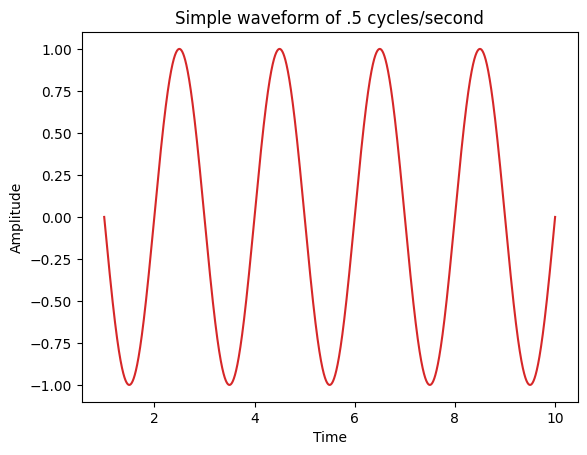

In [12]:
lower = c - (higher + a)

plt.figure()
plt.plot(t, lower, c='tab:red')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Simple waveform of .5 cycles/second")
plt.show()

Listen again to simple:

In [ ]:
ipd.display(ipd.Audio(data=tone_100,rate=sr))
ipd.display(ipd.Audio(data=tone_1000,rate=sr))
ipd.display(ipd.Audio(data=tone_10000,rate=sr))

versus complex sounds:

In [ ]:
c2 = tone_100 + tone_1000 + tone_10000
Audio(data=c2,rate=sr)

You can hear multiple frequencies in the latter. 

This simple addition only worked because all of our signals had the same sampling rate and the arrays were the same length. 

Next we'll generate some audio signals that are still periodic, meaing that they repeat, but they are not sinusoidal. Some examples of this are **square wave** and **sawtooth wave** functions. Square wave functions have only two possible amplitudes while sawtooth functions have amplitudes that increase or decrease linearly over the course of the period cycle. We'll use functions from the `scipy` library to generate these signals. 

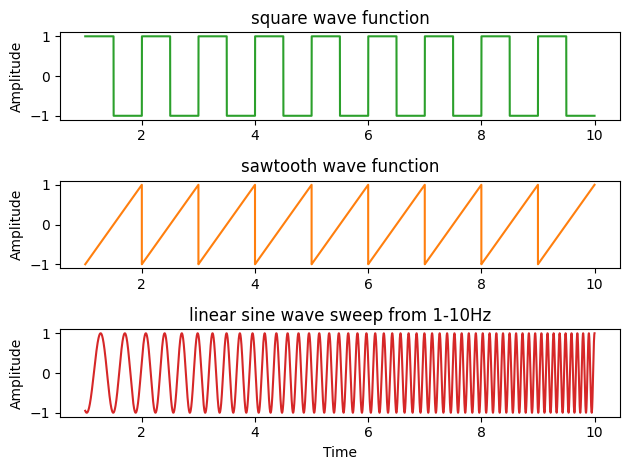

In [15]:
# the square wave function 
sq_a = sc.signal.square((2*np.pi)*t)

# saw tooth
st_a = sc.signal.sawtooth((2*np.pi)*t) 

# linear sine wave sweep
sweep_a = sc.signal.chirp(t,f0=1, f1=10, t1=10, method='linear')
#sweep_a = lb.chirp(fmin=100,fmax=1000,sr=sr,duration=10) # librosa also has a built-in function

fig, axs = plt.subplots(3)
axs[0].plot(t,sq_a,'tab:green')
axs[0].set_title('square wave function')
axs[1].plot(t,st_a,'tab:orange')
axs[1].set_title('sawtooth wave function')
axs[2].plot(t,sweep_a,'tab:red')
axs[2].set_title('linear sine wave sweep from 1-10Hz')
plt.ylabel('Amplitude')
plt.xlabel('Time')
fig.tight_layout()

for ax in axs.flat:
    ax.set(ylabel='Amplitude')

In [ ]:
# let's listen to these different periodic sounds
ipd.display(ipd.Audio(data=sq_a,rate=sr))
ipd.display(ipd.Audio(data=st_a,rate=sr))
ipd.display(ipd.Audio(data=sc.signal.chirp(t,f0=100, f1=1000, t1=10, method='linear'),rate=sr)) # in a range that we can actually hear

## Synthesizing aperiodic signals<a name="aperiodic"></a>  

Finally, we'll discuss aperiodic signals, or those that do not repeat. By far the most common aperiodic signal that you will encounter is white noise. Because aperiodic signals are random, and we'd like to be able to replicate our results, we'll first set the seed and then generate a normally-distributed yet random array of numbers: 

In [ ]:
np.random.seed(123)
num_samp = 5000
white_noise = np.random.normal(loc=0,scale=1,size=num_samp) # loc=mean; scale=SD; size=num. of samples

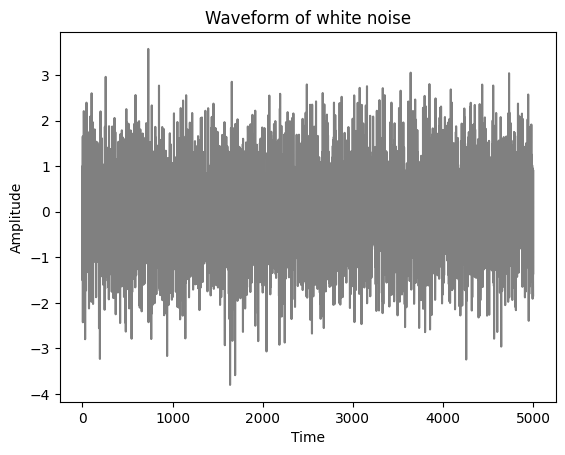

In [18]:
plt.figure()
plt.plot(white_noise, c='gray')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Waveform of white noise")
plt.show()

White noise is also characterized by its flat frequency spectrum---the amplitude of the signal is relatively constant across frequencies:

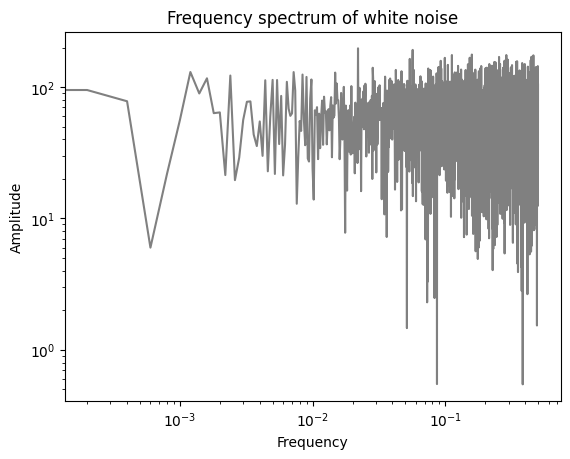

In [19]:
def plot_spectrum(s,color):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)), c=color)[0]
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.title("Frequency spectrum of white noise")

plot_spectrum(white_noise,'gray')

There are additional varieties of random, aperiodic sounds that can be synthesized. These signals differ from white noise in their [energy profiles](https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python). 

The final type of aperiodic sound that we'll consider is a **transient sound**, or a brief, unsustained yet random burst of energy. It's easiest to grasp transient sounds when you consider examples from your environment like a car door slamming or someone clapping their hands together. 